In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"D:\Data_Analytics\Machine learning\Datasets\Ice_cream selling data.csv") 

In [3]:
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [14]:
data = data.rename(columns={"Ice Cream Sales (units)": "icecream"})


In [15]:
data.columns

Index(['Temperature (°C)', 'icecream'], dtype='object')

<Axes: >

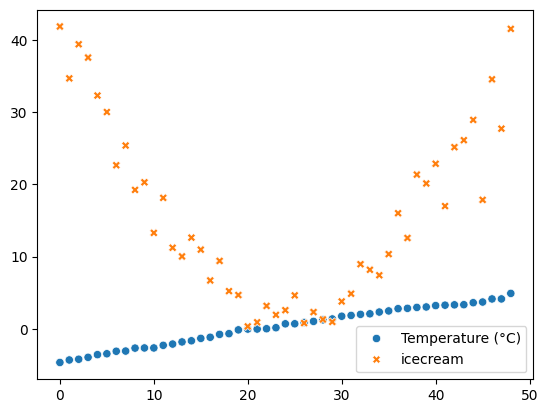

In [19]:
sns.scatterplot(data)

In [20]:
data.corr()

,Temperature (°C),icecream
Temperature (°C),1.000000,-0.175184
icecream,-0.175184,1.000000


In [21]:
x=data[["Temperature (°C)"]]
y=data["icecream"]

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
pf = PolynomialFeatures(degree=2)

In [25]:
pf.fit(x)

PolynomialFeatures()

In [27]:
x=pf.transform(x)

In [28]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr =  LinearRegression()

In [59]:
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
lr.score(x_test,y_test)*100


86.9722394296994

In [74]:
prd=lr.predict(x)
prd

array([46.28829242, 40.30868372, 38.61970519, 34.44719239, 29.02622645,
       27.34430221, 22.89221674, 22.56315494, 17.93598234, 17.7237041 ,
       17.71543516, 14.15262049, 12.59891636, 10.27361929,  9.14748946,
        7.0809917 ,  6.2711284 ,  4.56838959,  4.23647631,  3.09552192,
        2.98263237,  2.9808681 ,  2.95123333,  2.90092729,  3.38830559,
        3.3975202 ,  3.80684109,  4.23533963,  5.00374581,  5.50051288,
        7.43819216,  8.10221843,  9.06724758,  9.59046786, 11.41554552,
       12.67784199, 15.52377758, 15.98188093, 17.27479462, 17.91090693,
       19.98805112, 20.6549884 , 21.18708613, 21.41909631, 24.78011403,
       25.98445972, 31.90665313, 31.94576536, 44.26711471])

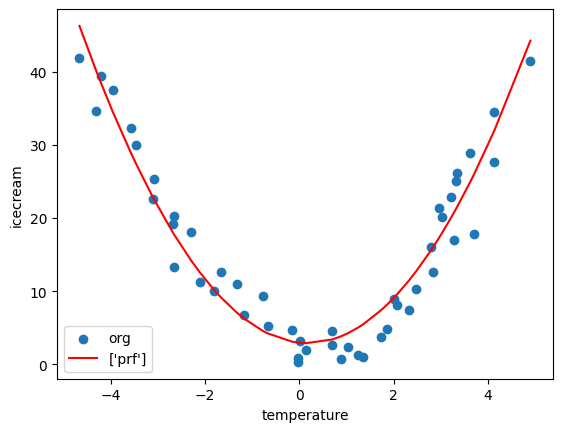

In [62]:
plt.scatter(data["Temperature (°C)"],data["icecream"])
plt.plot(data["Temperature (°C)"],prd,c="red")
plt.xlabel("temperature")
plt.ylabel("icecream")
plt.legend (["org",["prf"]])

In [71]:
test = pf.transform([[-4.662263]])
test

C:\Users\Hakim\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[ 1.        , -4.662263  , 21.73669628]])

In [72]:
lr.predict(test)

array([46.28829821])

## Behind the scene

In [78]:
#y = m1x1 + m2 + 2^2 +c


In [51]:
lr.coef_

array([ 0.        , -0.68599474,  1.82418577])

In [80]:
lr.intercept_

2.956694040942283